## Importing all the required liveraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the database

In [2]:
data = pd.read_csv("C:\\Users\\HP\\Documents\\Machine learning\\Dataset\\heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##  EDA

In [3]:
data["DEATH_EVENT"].unique()

array([1, 0], dtype=int64)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Plotting heatmap for showing the relationship between the features

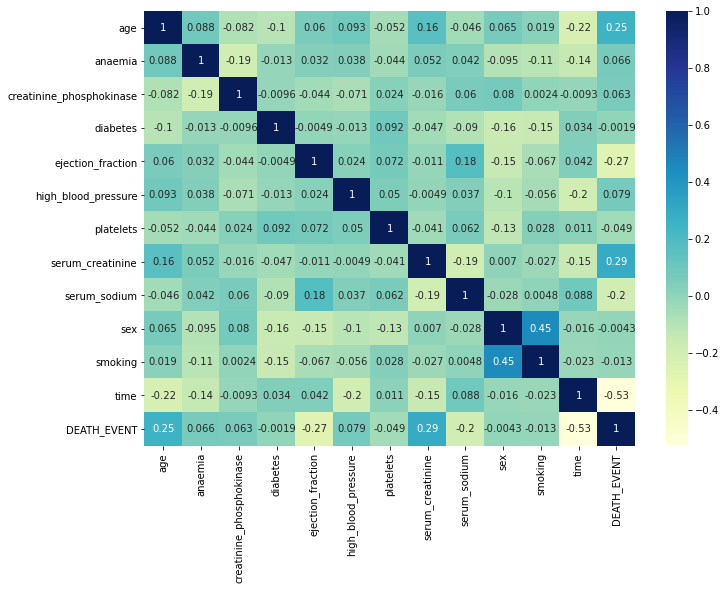

In [7]:
plt.figure(figsize=(11, 8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Selection of feature set and target set

In [8]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Standarizing the feature set

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainset = scaler.fit_transform(X)

## Spliting the dataset

In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 10)
print("size of train set :", train_x.shape, train_y.shape)
print("size of test set :", test_x.shape, test_y.shape)

size of train set : (239, 12) (239,)
size of test set : (60, 12) (60,)


##  Logistic regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
tr_model = model.fit(train_x, train_y)
y_pred = model.predict(test_x)

In [12]:
from sklearn.metrics import mean_squared_error
print ("Accuracy : ", model.score(test_x, test_y))
print ("mean_squared_error : ", mean_squared_error(test_y, y_pred))

Accuracy :  0.8
mean_squared_error :  0.2


<AxesSubplot:>

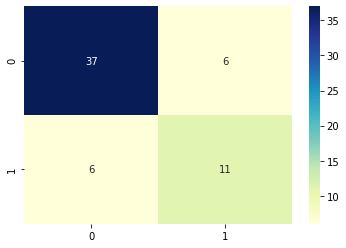

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, cmap="YlGnBu", annot = True)

## Suppost vector Machine

In [14]:
# 1
from sklearn.svm import SVC
model1 = SVC()
tr_fitting = model1.fit(train_x, train_y)
y_predt = model1.predict(test_x)
model1.score(test_x, test_y)

0.7166666666666667

In [15]:
# 2
sv = SVC(kernel = "linear")
fitt = sv.fit(train_x, train_y)
prediction = sv.predict(test_x)
sv.score(test_x, test_y)

0.8

## Tunning the parameter / hyperparameter

In [16]:
from sklearn.model_selection import GridSearchCV
prams = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

svm_model = GridSearchCV(SVC(), prams, refit = True, cv = 5)
svm_model.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [17]:
# print best parameter after tuning
print(svm_model.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svm_model.best_estimator_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)


In [18]:
svm_pred = svm_model.predict(test_x)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(test_y, svm_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        43
           1       1.00      0.12      0.21        17

    accuracy                           0.75        60
   macro avg       0.87      0.56      0.53        60
weighted avg       0.81      0.75      0.67        60

